In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

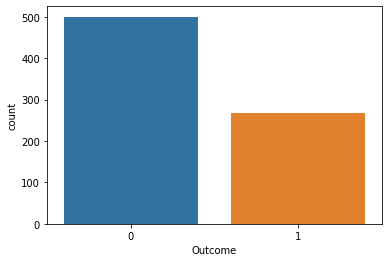

In [7]:
sns.countplot(data=df,x="Outcome")
plt.show()

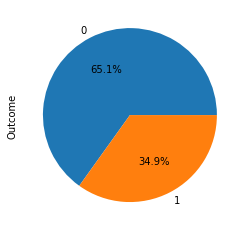

In [8]:
df["Outcome"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [9]:
#no: 65.1% and Yes=34.9%

In [10]:
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [11]:
#use train_test_split : 70% & 30%
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
from sklearn.metrics import classification_report

In [14]:
#function create
def create_model(model):
    model.fit(X_train,Y_train) #we train the model
    y_pred=model.predict(X_test)  #test
    print(classification_report(Y_test,y_pred))
    return model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [17]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



LogisticRegression()

In [18]:
#here no apply data analysis means model : overfit 
#we use DecisionTreeClassifier algorithm (it is select the imp features)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier()

In [21]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.57      0.52      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.67      0.68      0.68       231



In [22]:
dt1.feature_importances_

array([0.04955336, 0.28668727, 0.15011803, 0.07194361, 0.04158259,
       0.20747426, 0.10905951, 0.08358137])

In [23]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [24]:
from sklearn import tree

In [25]:
features=X.columns

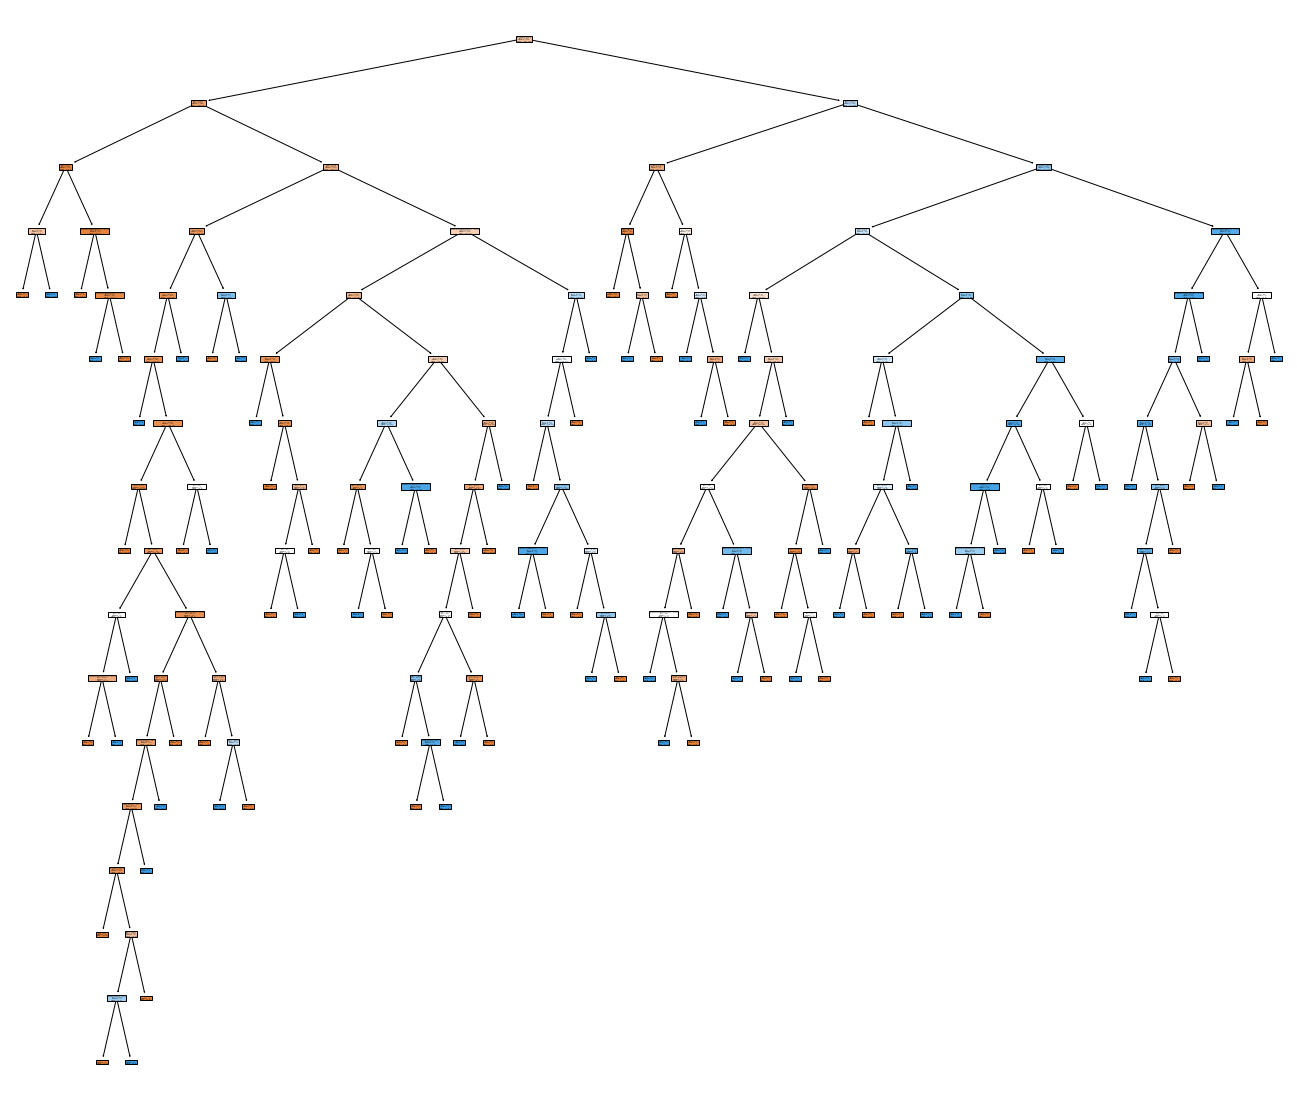

In [26]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [27]:
#pruning Technique
#model :overfit, then we reduced overfitting situation, use pruning technique

In [28]:
#1. max_depth parameter use:
dt2=DecisionTreeClassifier(max_depth=5) #max_depth<=8

In [29]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       146
           1       0.71      0.68      0.69        85

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [30]:
dt2.feature_importances_

array([0.04146436, 0.44719913, 0.02450952, 0.        , 0.01273346,
       0.21681899, 0.09716112, 0.16011341])

In [31]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

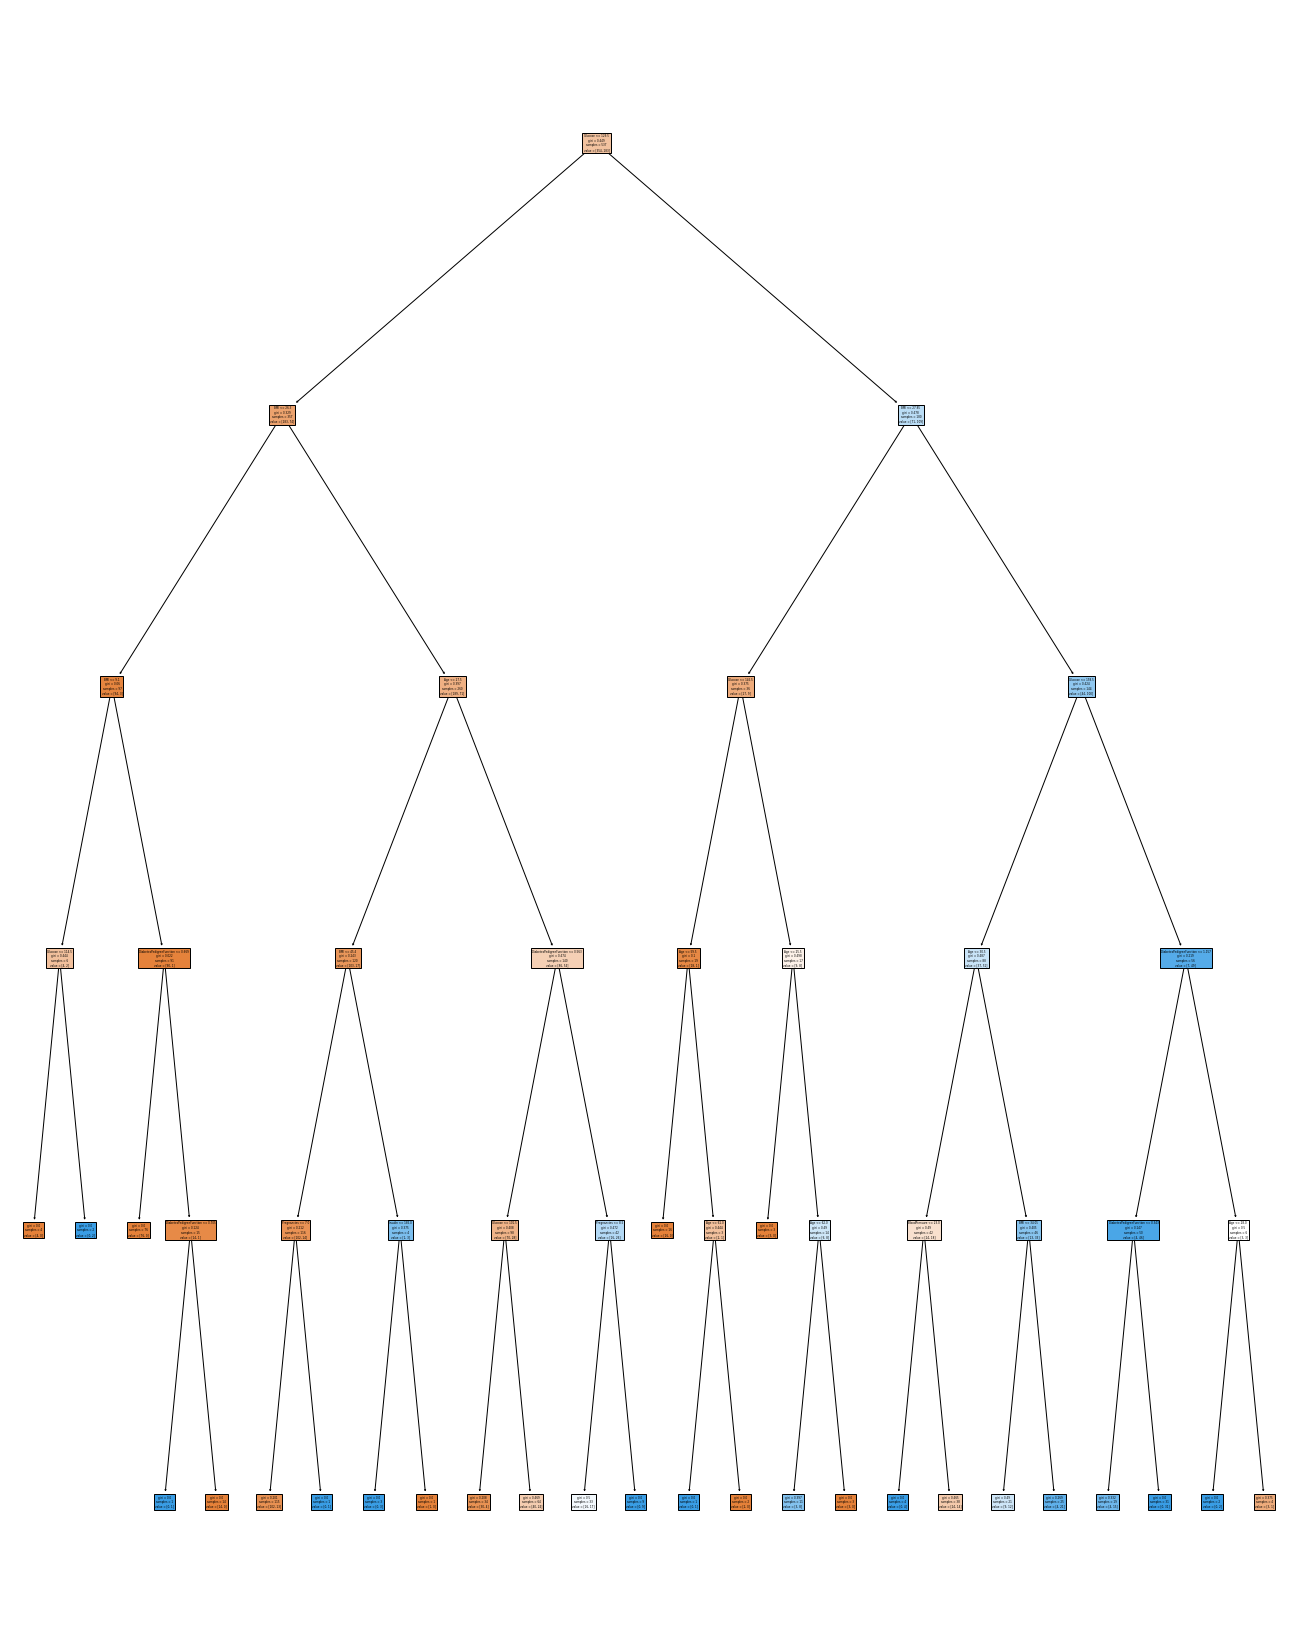

In [32]:
fig=plt.figure(figsize=(23,30))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [33]:
#use support vector machine - it's also a classification algorithm

In [34]:
from sklearn.svm import LinearSVC  

In [35]:
#create object of LinearSVC
svc=LinearSVC(random_state=1,C=0.01) #C means add error 0.01 0.05 0.09

In [36]:
#call function
create_model(svc)

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       146
           1       0.64      0.16      0.26        85

    accuracy                           0.66       231
   macro avg       0.65      0.55      0.52       231
weighted avg       0.65      0.66      0.59       231



LinearSVC(C=0.01, random_state=1)

In [37]:
#LinearSVC identify 0 value correctly but not 1 value

In [38]:
#polynomial kernel (to increase the dimension) use in no-Linearly

In [39]:
from sklearn.svm import SVC

In [40]:
poly_svc=SVC(random_state=1,kernel="poly")

In [41]:
create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       146
           1       0.86      0.51      0.64        85

    accuracy                           0.79       231
   macro avg       0.81      0.73      0.74       231
weighted avg       0.80      0.79      0.77       231



SVC(kernel='poly', random_state=1)

In [42]:
#apply ensembling tecnique
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier

In [43]:
#create of of AdaBoostClassifier class
ada=AdaBoostClassifier()

In [44]:
#call function
create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.59      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



AdaBoostClassifier()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=100)

In [47]:
#call function
create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



GradientBoostingClassifier()

In [48]:
#data Imbalance: to solve this problem we use sampling technique

In [49]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [51]:
#create object of RandomOverSampler() class
ros=RandomOverSampler()

In [52]:
X_sample1,Y_sample1=ros.fit_sample(X_train,Y_train)

In [53]:
pd.Series(Y_train).value_counts()

0    354
1    183
Name: Outcome, dtype: int64

In [54]:
pd.Series(Y_sample1).value_counts()

1    354
0    354
Name: Outcome, dtype: int64

In [55]:
#after sampling we use DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=3) #use pruning technique

In [56]:
dt2.fit(X_sample1,Y_sample1) #we train model

DecisionTreeClassifier(max_depth=3)

In [57]:
pd.Series(Y_test).value_counts()

0    146
1     85
Name: Outcome, dtype: int64

In [58]:
X_sample_test,Y_sample_test=ros.fit_sample(X_test,Y_test)

In [59]:
y_pred=dt2.predict(X_sample_test)  #test the model

In [60]:
print(classification_report(Y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       146
           1       0.73      0.77      0.75       146

    accuracy                           0.74       292
   macro avg       0.74      0.74      0.74       292
weighted avg       0.74      0.74      0.74       292



In [61]:
#create object of RandomUnderSampler() class
rus=RandomUnderSampler()

In [62]:
pd.Series(Y_train).value_counts()

0    354
1    183
Name: Outcome, dtype: int64

In [63]:
X_sample2,Y_sample2=rus.fit_sample(X_train,Y_train)

In [64]:
pd.Series(Y_sample2).value_counts()

1    183
0    183
Name: Outcome, dtype: int64

In [65]:
X_sample_test2,Y_sample_test2=rus.fit_sample(X_test,Y_test)

In [66]:
pd.Series(Y_sample_test2).value_counts()

1    85
0    85
Name: Outcome, dtype: int64

In [67]:
#after under sampling we use DecisionTreeClassifier
dt3=DecisionTreeClassifier(max_depth=3)

In [68]:
dt3.fit(X_sample2,Y_sample2) #We train the model

DecisionTreeClassifier(max_depth=3)

In [69]:
y_pred=dt3.predict(X_sample_test2)  #test the model

In [70]:
print(classification_report(Y_sample_test2,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74        85
           1       0.72      0.89      0.80        85

    accuracy                           0.77       170
   macro avg       0.79      0.77      0.77       170
weighted avg       0.79      0.77      0.77       170



In [71]:
#GrandientBoosting use on random under sampler
gbc1=GradientBoostingClassifier(n_estimators=100)

In [72]:
gbc1.fit(X_sample2,Y_sample2) #train the model

GradientBoostingClassifier()

In [73]:
y_pred=gbc1.predict(X_sample_test2) #test the model

In [74]:
print(classification_report(Y_sample_test2,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.76        85
           1       0.74      0.86      0.79        85

    accuracy                           0.78       170
   macro avg       0.78      0.78      0.77       170
weighted avg       0.78      0.78      0.77       170



In [75]:
#GrandientBoosting use on random over sampler
gbc2=GradientBoostingClassifier(n_estimators=100)

In [76]:
gbc2.fit(X_sample1,Y_sample1)

GradientBoostingClassifier()

In [77]:
y_pred=gbc2.predict(X_sample_test)  

In [78]:
print(classification_report(Y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       146
           1       0.81      0.81      0.81       146

    accuracy                           0.81       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.81      0.81      0.81       292

